<a href="https://colab.research.google.com/github/codewithpradeep14/Minor_course_projects_and_labs/blob/main/Module_9_lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 9: Neural Networks

Lab 1: Introduction to Multi-Layer Perceptron (MLP)

Module Coordinator: Shantanu Agrawal

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline

# # The following code is used for hiding the warnings and make this notebook clearer.
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [2]:
## Code to plot decision boundary ##

def plot_decision_regions(X, y, classifier, method, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    if method == 'numpy':
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    elif method == 'pytorch':
        inp = torch.tensor([xx1.ravel(), xx2.ravel()], dtype=torch.float, requires_grad=False).T
        Z = np.array([]).reshape(0,1)
        for data in inp:
            out = classifier(data)
            Z = np.vstack((Z, out.data.numpy()))
    else:
        print('Not implemented')
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [3]:
torch.manual_seed(0)

X = torch.tensor([[0,0],[0,1], [1,0], [1,1]], dtype=torch.float, requires_grad=False)
Y = torch.tensor([0,1,1,0], dtype=torch.float, requires_grad=False)


In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Initialize all the layers with learnable parameters
        self.fc1 = nn.Linear(2, 2, bias=True)
        self.fc2 = nn.Linear(2, 1, bias=True)

    def forward(self, x):
        # Write the forward pass
        # Note that we use a sigmoid activation function here
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        return x

model = Net()

In [5]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)


In [6]:
# Use a mean square error loss
loss_func = nn.MSELoss()

In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [8]:
epochs = 5000
steps = X.size(0)
for i in range(epochs): # iterate over epoch
    for j in range(steps): # iterate over sample
        # randomly sample the inputs
        sample = np.random.randint(X.size(0))
        x_var = X[sample]
        y_var = Y[sample]

        optimizer.zero_grad()

        y_hat = model(x_var)

        loss = loss_func.forward(y_hat[0], y_var)


        # BACKPROP! You will see more details about this next week!
        loss.backward()

        optimizer.step()

    if i % 500 == 0:
        print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

Epoch: 0, Loss: 0.3160923719406128, 
Epoch: 500, Loss: 0.3819819390773773, 
Epoch: 1000, Loss: 0.20426280796527863, 
Epoch: 1500, Loss: 0.2315487116575241, 
Epoch: 2000, Loss: 0.23796884715557098, 
Epoch: 2500, Loss: 0.2244189828634262, 
Epoch: 3000, Loss: 0.2428750991821289, 
Epoch: 3500, Loss: 0.2353019118309021, 
Epoch: 4000, Loss: 0.20288167893886566, 
Epoch: 4500, Loss: 0.2512117922306061, 


In [9]:
for data in X:
    output = model(data)
    print(data, np.round(output.data.numpy()))

tensor([0., 0.]) [0.]
tensor([0., 1.]) [1.]
tensor([1., 0.]) [0.]
tensor([1., 1.]) [0.]


<ipython-input-2-d74ee9bebb86>:18: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  inp = torch.tensor([xx1.ravel(), xx2.ravel()], dtype=torch.float, requires_grad=False).T
<ipython-input-2-d74ee9bebb86>:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


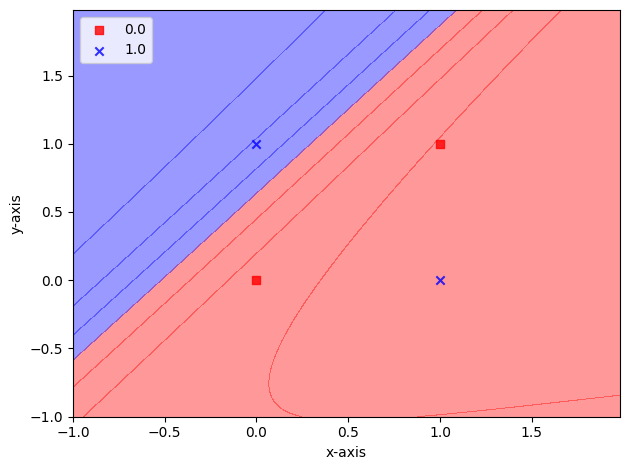

In [10]:
np.random.seed(0)
plot_decision_regions(X.detach().numpy(), Y.detach().numpy(), model, 'pytorch')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

***EXERCISE:-***
1. Try using the MLP classifier for different logic gates other than XOR like AND, OR, NOR etc.


Training for AND gate:
Epoch: 0, Loss: 0.22212426364421844, 
Epoch: 500, Loss: 0.01694096252322197, 
Epoch: 1000, Loss: 0.034953899681568146, 
Epoch: 1500, Loss: 0.0054583437740802765, 
Epoch: 2000, Loss: 0.0031589691061526537, 
Epoch: 2500, Loss: 0.0022282612044364214, 
Epoch: 3000, Loss: 0.0015963054029271007, 
Epoch: 3500, Loss: 2.8504828151199035e-06, 
Epoch: 4000, Loss: 0.000872677774168551, 
Epoch: 4500, Loss: 1.780583374966227e-06, 
tensor([0., 0.]) [0.]
tensor([0., 1.]) [0.]
tensor([1., 0.]) [0.]
tensor([1., 1.]) [1.]


<ipython-input-11-45b8a1b46912>:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


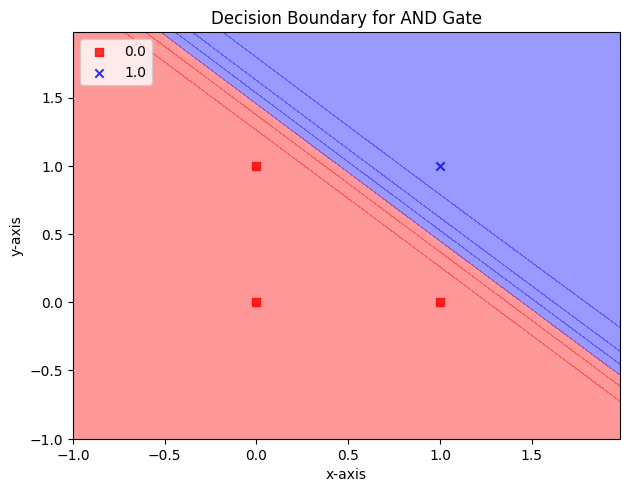

Training for OR gate:
Epoch: 0, Loss: 0.4544511139392853, 
Epoch: 500, Loss: 0.5999101996421814, 
Epoch: 1000, Loss: 0.054023586213588715, 
Epoch: 1500, Loss: 0.6743014454841614, 
Epoch: 2000, Loss: 0.5357956290245056, 
Epoch: 2500, Loss: 0.0880405455827713, 
Epoch: 3000, Loss: 0.01474350318312645, 
Epoch: 3500, Loss: 0.0012406727764755487, 
Epoch: 4000, Loss: 0.003108103759586811, 
Epoch: 4500, Loss: 0.0005298064788803458, 
tensor([0., 0.]) [0.]
tensor([0., 1.]) [1.]
tensor([1., 0.]) [1.]
tensor([1., 1.]) [1.]


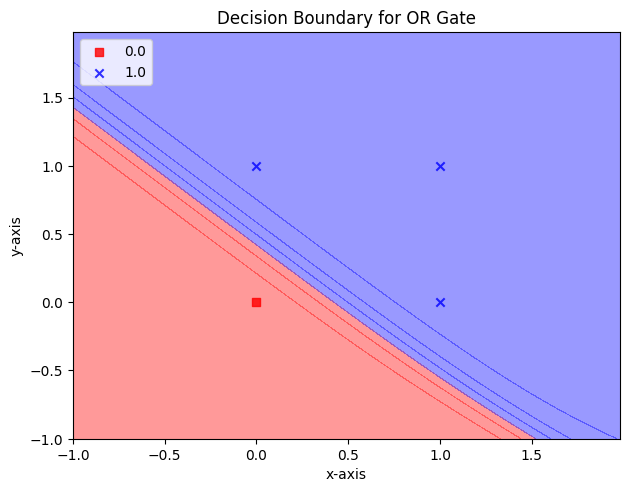

In [11]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline

# Code to plot decision boundary

def plot_decision_regions(X, y, classifier, method, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    if method == 'numpy':
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    elif method == 'pytorch':
        inp = torch.tensor([xx1.ravel(), xx2.ravel()], dtype=torch.float, requires_grad=False).T
        Z = np.array([]).reshape(0,1)
        for data in inp:
            out = classifier(data)
            Z = np.vstack((Z, out.data.numpy()))
    else:
        print('Not implemented')
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

torch.manual_seed(0)

X = torch.tensor([[0,0],[0,1], [1,0], [1,1]], dtype=torch.float, requires_grad=False)
# Change Y for AND gate
Y_and = torch.tensor([0,0,0,1], dtype=torch.float, requires_grad=False)
# Change Y for OR gate
Y_or = torch.tensor([0,1,1,1], dtype=torch.float, requires_grad=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Initialize all the layers with learnable parameters
        self.fc1 = nn.Linear(2, 2, bias=True)
        self.fc2 = nn.Linear(2, 1, bias=True)

    def forward(self, x):
        # Write the forward pass
        # Note that we use a sigmoid activation function here
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        return x

model = Net()

def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)

# Use a mean square error loss
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
epochs = 5000
steps = X.size(0)

# Train for AND gate
print("Training for AND gate:")
for i in range(epochs): # iterate over epoch
    for j in range(steps): # iterate over sample
        # randomly sample the inputs
        sample = np.random.randint(X.size(0))
        x_var = X[sample]
        y_var = Y_and[sample]

        optimizer.zero_grad()

        y_hat = model(x_var)

        loss = loss_func.forward(y_hat[0], y_var)

        # BACKPROP! You will see more details about this next week!
        loss.backward()

        optimizer.step()

    if i % 500 == 0:
        print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

for data in X:
    output = model(data)
    print(data, np.round(output.data.numpy()))

plot_decision_regions(X.detach().numpy(), Y_and.detach().numpy(), model, 'pytorch')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.title('Decision Boundary for AND Gate')
plt.show()

# Train for OR gate
print("Training for OR gate:")
weights_init(model)
for i in range(epochs): # iterate over epoch
    for j in range(steps): # iterate over sample
        # randomly sample the inputs
        sample = np.random.randint(X.size(0))
        x_var = X[sample]
        y_var = Y_or[sample]

        optimizer.zero_grad()

        y_hat = model(x_var)

        loss = loss_func.forward(y_hat[0], y_var)

        # BACKPROP! You will see more details about this next week!
        loss.backward()

        optimizer.step()

    if i % 500 == 0:
        print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

for data in X:
    output = model(data)
    print(data, np.round(output.data.numpy()))

plot_decision_regions(X.detach().numpy(), Y_or.detach().numpy(), model, 'pytorch')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.title('Decision Boundary for OR Gate')
plt.show()


2. Try to change 0/1 logic to -1/+1 logic. What happens with an SLP in this case? What about an MLP?


Training for AND gate:
Epoch: 0, Loss: 2.139241933822632, 
Epoch: 500, Loss: 1.0086690187454224, 
Epoch: 1000, Loss: 0.3852747082710266, 
Epoch: 1500, Loss: 1.0018092393875122, 
Epoch: 2000, Loss: 0.009577823802828789, 
Epoch: 2500, Loss: 1.002817988395691, 
Epoch: 3000, Loss: 1.0005077123641968, 
Epoch: 3500, Loss: 1.0016226768493652, 
Epoch: 4000, Loss: 0.002589564537629485, 
Epoch: 4500, Loss: 0.0022188599687069654, 
tensor([-1., -1.]) [0.]
tensor([-1.,  1.]) [0.]
tensor([ 1., -1.]) [0.]
tensor([1., 1.]) [1.]


<ipython-input-12-d0b69dcaa5a2>:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


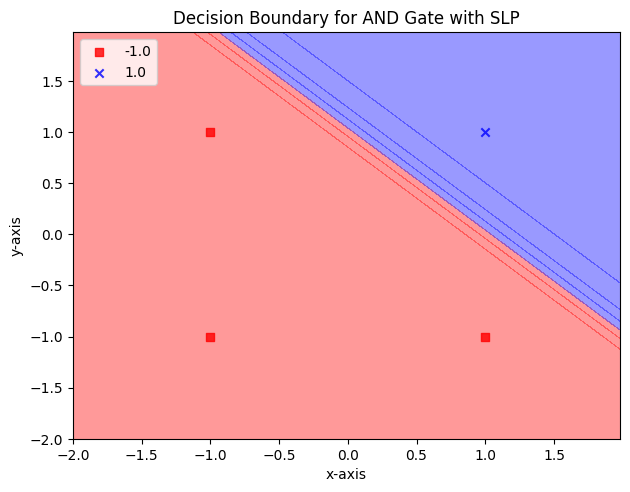

Training for OR gate:
Epoch: 0, Loss: 0.00014996044046711177, 
Epoch: 500, Loss: 1.0721396207809448, 
Epoch: 1000, Loss: 0.0017077139345929027, 
Epoch: 1500, Loss: 1.0126192569732666, 
Epoch: 2000, Loss: 1.0074608325958252, 
Epoch: 2500, Loss: 2.4380375407417887e-07, 
Epoch: 3000, Loss: 0.000437999697169289, 
Epoch: 3500, Loss: 1.0029770135879517, 
Epoch: 4000, Loss: 0.00022432595142163336, 
Epoch: 4500, Loss: 1.0021253824234009, 
tensor([-1., -1.]) [0.]
tensor([-1.,  1.]) [1.]
tensor([ 1., -1.]) [1.]
tensor([1., 1.]) [1.]


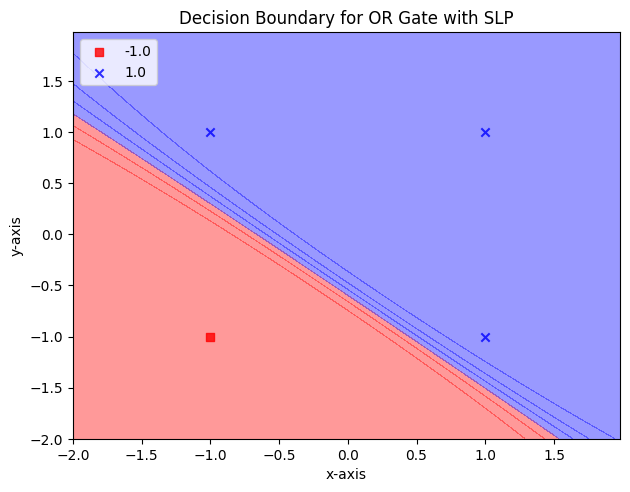

In [12]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline

# Code to plot decision boundary

def plot_decision_regions(X, y, classifier, method, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    if method == 'numpy':
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    elif method == 'pytorch':
        inp = torch.tensor([xx1.ravel(), xx2.ravel()], dtype=torch.float, requires_grad=False).T
        Z = np.array([]).reshape(0,1)
        for data in inp:
            out = classifier(data)
            Z = np.vstack((Z, out.data.numpy()))
    else:
        print('Not implemented')
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

torch.manual_seed(0)

X = torch.tensor([[-1,-1],[-1,1], [1,-1], [1,1]], dtype=torch.float, requires_grad=False)
# Change Y for AND gate
Y_and = torch.tensor([-1,-1,-1,1], dtype=torch.float, requires_grad=False)
# Change Y for OR gate
Y_or = torch.tensor([-1,1,1,1], dtype=torch.float, requires_grad=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Initialize all the layers with learnable parameters
        self.fc1 = nn.Linear(2, 2, bias=True)
        self.fc2 = nn.Linear(2, 1, bias=True)

    def forward(self, x):
        # Write the forward pass
        # Note that we use a sigmoid activation function here
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        return x

model = Net()

def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)

# Use a mean square error loss
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
epochs = 5000
steps = X.size(0)

# Train for AND gate
print("Training for AND gate:")
for i in range(epochs): # iterate over epoch
    for j in range(steps): # iterate over sample
        # randomly sample the inputs
        sample = np.random.randint(X.size(0))
        x_var = X[sample]
        y_var = Y_and[sample]

        optimizer.zero_grad()

        y_hat = model(x_var)

        loss = loss_func.forward(y_hat[0], y_var)

        # BACKPROP! You will see more details about this next week!
        loss.backward()

        optimizer.step()

    if i % 500 == 0:
        print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

for data in X:
    output = model(data)
    print(data, np.round(output.data.numpy()))

plot_decision_regions(X.detach().numpy(), Y_and.detach().numpy(), model, 'pytorch')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.title('Decision Boundary for AND Gate with SLP')
plt.show()

# Train for OR gate
print("Training for OR gate:")
weights_init(model)
for i in range(epochs): # iterate over epoch
    for j in range(steps): # iterate over sample
        # randomly sample the inputs
        sample = np.random.randint(X.size(0))
        x_var = X[sample]
        y_var = Y_or[sample]

        optimizer.zero_grad()

        y_hat = model(x_var)

        loss = loss_func.forward(y_hat[0], y_var)

        # BACKPROP! You will see more details about this next week!
        loss.backward()

        optimizer.step()

    if i % 500 == 0:
        print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

for data in X:
    output = model(data)
    print(data, np.round(output.data.numpy()))

plot_decision_regions(X.detach().numpy(), Y_or.detach().numpy(), model, 'pytorch')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.title('Decision Boundary for OR Gate with SLP')
plt.show()


3. Try removing the activation function from the MLP and rerun the code. What happens in this case?

Ans:- When you remove the activation function from the hidden layer, the model essentially becomes a linear transformation followed by a sigmoid activation function at the output layer. This means the model cannot learn non-linear decision boundaries, and its capability is limited to linear transformations.


Can you tell why particular activation function can be used in the model architecture?

Ans:- Particular activation function can be used in the model architecture, it depends on the problem and the characteristics of the data. Activation functions introduce non-linearities into the model, allowing it to learn complex patterns and relationships in the data. Different activation functions have different properties such as ,
Sigmoid and Tanh: These activation functions squash the output to the range [0, 1] and [-1, 1] respectively, making them suitable for binary classification tasks or tasks where the output needs to be normalized within a certain range, and many more .


here is the code :-

Training for AND gate:
Epoch: 0, Loss: 2.440436363220215, 
Epoch: 500, Loss: 0.0004427502572070807, 
Epoch: 1000, Loss: 0.00018918591376859695, 
Epoch: 1500, Loss: 0.00011770337005145848, 
Epoch: 2000, Loss: 1.000213384628296, 
Epoch: 2500, Loss: 6.668672722298652e-05, 
Epoch: 3000, Loss: 1.0, 
Epoch: 3500, Loss: 4.499121496337466e-05, 
Epoch: 4000, Loss: 1.0, 
Epoch: 4500, Loss: 3.2971402106340975e-05, 
tensor([-1., -1.]) [0.]
tensor([-1.,  1.]) [0.]
tensor([ 1., -1.]) [0.]
tensor([1., 1.]) [1.]


<ipython-input-13-6946fc187079>:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


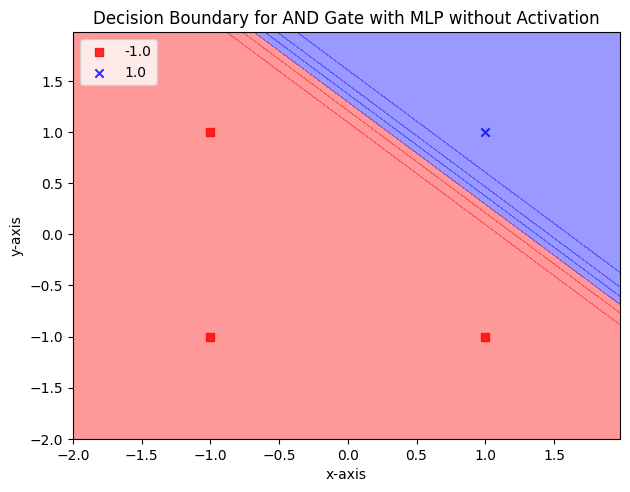

Training for OR gate:
Epoch: 0, Loss: 0.012107176706194878, 
Epoch: 500, Loss: 0.0001135884303948842, 
Epoch: 1000, Loss: 1.0005255937576294, 
Epoch: 1500, Loss: 1.6490619600517675e-05, 
Epoch: 2000, Loss: 1.0004603862762451, 
Epoch: 2500, Loss: 7.51754214434186e-12, 
Epoch: 3000, Loss: 1.4210854715202004e-14, 
Epoch: 3500, Loss: 0.00015184952644631267, 
Epoch: 4000, Loss: 9.83425707090646e-05, 
Epoch: 4500, Loss: 1.0001716613769531, 
tensor([-1., -1.]) [0.]
tensor([-1.,  1.]) [1.]
tensor([ 1., -1.]) [1.]
tensor([1., 1.]) [1.]


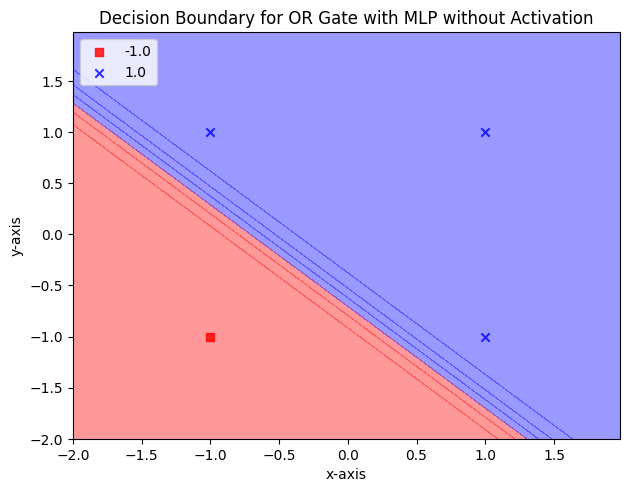

In [13]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline

# Code to plot decision boundary

def plot_decision_regions(X, y, classifier, method, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    if method == 'numpy':
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    elif method == 'pytorch':
        inp = torch.tensor([xx1.ravel(), xx2.ravel()], dtype=torch.float, requires_grad=False).T
        Z = np.array([]).reshape(0,1)
        for data in inp:
            out = classifier(data)
            Z = np.vstack((Z, out.data.numpy()))
    else:
        print('Not implemented')
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

torch.manual_seed(0)

X = torch.tensor([[-1,-1],[-1,1], [1,-1], [1,1]], dtype=torch.float, requires_grad=False)
# Change Y for AND gate
Y_and = torch.tensor([-1,-1,-1,1], dtype=torch.float, requires_grad=False)
# Change Y for OR gate
Y_or = torch.tensor([-1,1,1,1], dtype=torch.float, requires_grad=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Initialize all the layers with learnable parameters
        self.fc1 = nn.Linear(2, 2, bias=True)
        self.fc2 = nn.Linear(2, 1, bias=True)

    def forward(self, x):
        # Write the forward pass
        # Note that we use a sigmoid activation function here
        x = self.fc1(x)
        # Removed activation function from hidden layer
        x = self.fc2(x)
        x = torch.sigmoid(x)
        return x

model = Net()

def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)

# Use a mean square error loss
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
epochs = 5000
steps = X.size(0)

# Train for AND gate
print("Training for AND gate:")
for i in range(epochs): # iterate over epoch
    for j in range(steps): # iterate over sample
        # randomly sample the inputs
        sample = np.random.randint(X.size(0))
        x_var = X[sample]
        y_var = Y_and[sample]

        optimizer.zero_grad()

        y_hat = model(x_var)

        loss = loss_func.forward(y_hat[0], y_var)

        # BACKPROP! You will see more details about this next week!
        loss.backward()

        optimizer.step()

    if i % 500 == 0:
        print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

for data in X:
    output = model(data)
    print(data, np.round(output.data.numpy()))

plot_decision_regions(X.detach().numpy(), Y_and.detach().numpy(), model, 'pytorch')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.title('Decision Boundary for AND Gate with MLP without Activation')
plt.show()

# Train for OR gate
print("Training for OR gate:")
weights_init(model)
for i in range(epochs): # iterate over epoch
    for j in range(steps): # iterate over sample
        # randomly sample the inputs
        sample = np.random.randint(X.size(0))
        x_var = X[sample]
        y_var = Y_or[sample]

        optimizer.zero_grad()

        y_hat = model(x_var)

        loss = loss_func.forward(y_hat[0], y_var)

        # BACKPROP! You will see more details about this next week!
        loss.backward()

        optimizer.step()

    if i % 500 == 0:
        print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

for data in X:
    output = model(data)
    print(data, np.round(output.data.numpy()))

plot_decision_regions(X.detach().numpy(), Y_or.detach().numpy(), model, 'pytorch')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.title('Decision Boundary for OR Gate with MLP without Activation')
plt.show()
